In [58]:
%matplotlib inline

import optuna
import seaborn as sns
import matplotlib.pyplot as plt

best val: 0.448


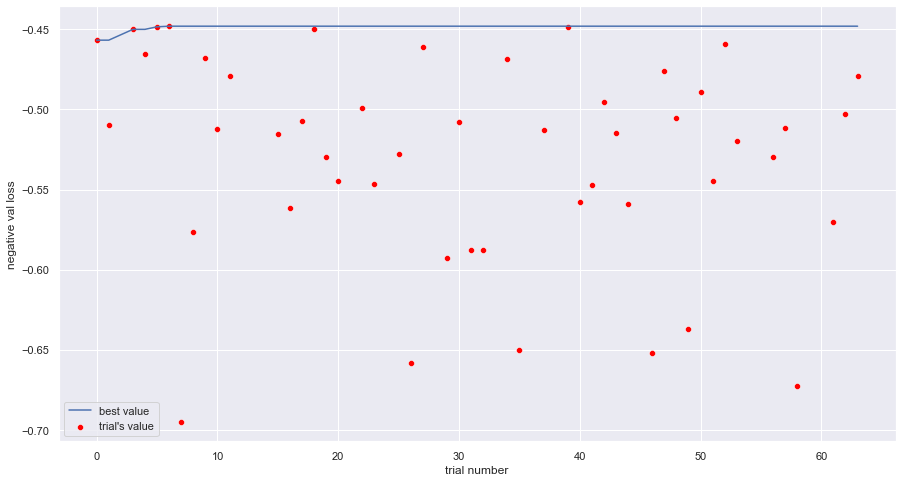

In [66]:
# loads study
study_name = "bayesian_opt_v2"
storage_name = f"sqlite:///C:/Users/Noaja/Downloads/msci_project/tth-ML-project/models/{study_name}.db"
study = optuna.load_study(study_name=study_name, storage=storage_name)

# converts study to DataFrame
df = study.trials_dataframe(attrs=("value", "params", "state"))
df.dropna(inplace=True)

# Removes loss values above threshold
threshold = .7
df['value'] = -abs(df['value'])
df = df[abs(df['value']) < threshold]

sns.set(rc = {'figure.figsize':(15,8)})
print('best val:', -round(df['value'].max(),4))

a = sns.lineplot(x=df.index, y=df['value'].cummax())
sns.scatterplot(x=df.index, y=df['value'], color='red')

a.set_xlabel('trial number')
a.set_ylabel('negative val loss')
a.legend(['best value', "trial's value"])

plt.show()

In [60]:
optuna.visualization.plot_param_importances(study)

In [61]:
optuna.visualization.plot_edf(study)

In [62]:
optuna.visualization.plot_parallel_coordinate(study)

In [63]:
optuna.visualization.plot_slice(study)

In [64]:
round(df.sort_values(by=['value'], ascending=False), 4).head(20)

,value,params_batch_size,params_dropout,params_lr,params_lstm_layer2,params_lstm_units,params_merged_units,params_num_merged_layers,params_output_units,params_redropout,state
6,-0.4480,16,0.0839,0.0002,True,60,340,4,48,0.1622,COMPLETE
5,-0.4484,16,0.1124,0.0077,True,240,160,1,14,0.4623,COMPLETE
39,-0.4487,128,0.2613,0.0015,True,360,340,3,158,0.0534,COMPLETE
18,-0.4498,16,0.0905,0.0060,True,140,60,1,30,0.2277,COMPLETE
3,-0.4500,64,0.3430,0.0029,True,360,200,4,178,0.3937,COMPLETE
0,-0.4567,64,0.3575,0.0249,True,160,100,4,102,0.0279,COMPLETE
52,-0.4588,16,0.0656,0.0083,True,180,140,1,55,0.2996,COMPLETE
27,-0.4613,16,0.1777,0.0011,True,60,160,2,25,0.1074,COMPLETE
4,-0.4654,32,0.1406,0.0143,False,100,340,1,12,0.0174,COMPLETE
9,-0.4676,128,0.4002,0.0021,True,220,180,3,137,0.3702,COMPLETE
